In [1]:
# gives us access to numerical calculations
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# the data set X, it has a one in the first column such that Xw is of the form y = w_0 + w_1 * x 
X = np.array([[1, 0.7], 
              [1, 2.5], 
              [1, 5.8]])

# the target values
y = np.dot(X, [0.1, 0.2])
print(y)
#y = np.array([1, 1.4, 2.5, 1.9, 3.2])

[0.24 0.6  1.26]


In [9]:
y = np.array([5, 2.75, -0.8])

## Visualize the data

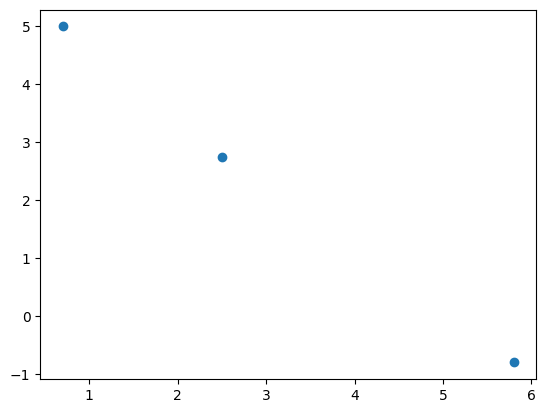

In [10]:
plot(X[:,1], y, 'o')

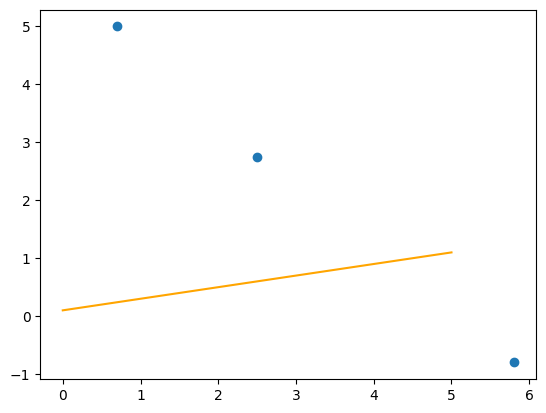

In [11]:
# a prediction based on the weight vector 0,0
w = np.array([0.1, 0.2])

def plot_model_and_data(w, X, y):
    # make predictions for 1000 values between 0.0 and 5.0
    x_test = np.linspace(0, 5, 1000).reshape(-1,1)

    # also add the columns of ones
    X_test = np.hstack( (np.ones((len(x_test),1)), x_test))
    y_pred = np.dot(X_test, w)

    # plot the test data and the prediction data
    plot(X[:,1], y, 'o')
    plot(X_test[:,1], y_pred, 'orange')
    
plot_model_and_data(w, X, y)

## How you would solve it in a real-life project?

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



[ 5.70568012 -1.12967115]


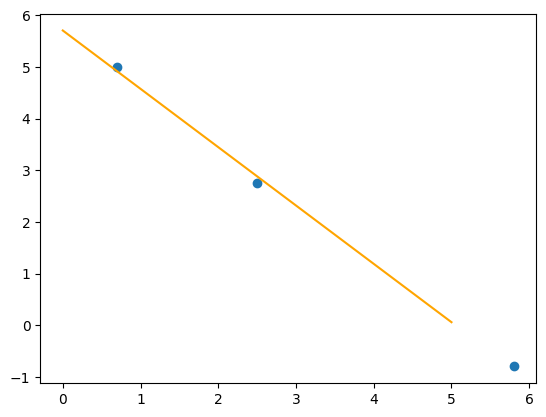

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept = False).fit(X, y) # We already have a column of ones, so no intercept needed
print(reg.coef_)

plot_model_and_data(reg.coef_, X, y)

But let's try to understand what's under the hood.

## Calculate the objective function / cost function -> MSE 
Let's first compare the predictions and targets

$$
\frac{1}{|D|} \sum_{<x,y> \in D} (y - f(x))^2 
$$

In [14]:
# the targets
print(y) 

# the predictions
w = np.array([0.1, 0.2])
y_pred = np.dot(X, w)
print(y_pred) 

[ 5.    2.75 -0.8 ]
[0.24 0.6  1.26]


In [15]:
# take the component-wise differences
differences = y_pred - y
print(differences)

[-4.76 -2.15  2.06]


In [16]:
# take the squares
diffs_squared = np.power(differences, 2)
print(diffs_squared)

[22.6576  4.6225  4.2436]


In [17]:
# sum them up 
sum_of_squares = np.sum(diffs_squared)
print(sum_of_squares)

31.523699999999998


In [18]:
# divide by the number of data points
mean_squared_error = sum_of_squares / X.shape[0]
print(mean_squared_error)

10.5079


Now wrap all of that up in a function `mean_squared_error` that returns the cost for a given parameter vector `w`

In [19]:
def mean_squared_error(w, X, y):
    pass


def mean_squared_error(w, X, y):
    y_pred = np.dot(X, w)
    differences = y_pred - y
    diffs_squared = np.power(differences, 2)
    sum_of_squares = np.sum(diffs_squared)
    mse = sum_of_squares / X.shape[0]
    return mse

print(mean_squared_error(w, X, y))

10.5079


Now try this again for different values of w, for example:

102.41083333333331


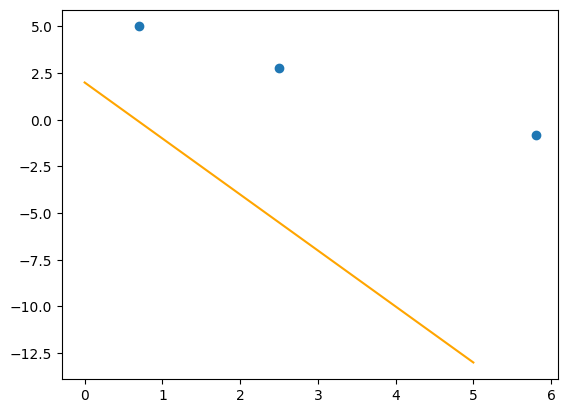

In [24]:
# for example 
w = np.array([2, -3])

plot_model_and_data(w, X, y)
print(mean_squared_error(w, X, y))

## Gradient update

Let's start with an arbitrary value:

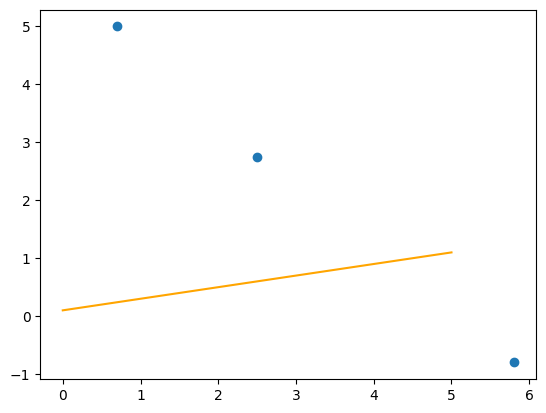

In [25]:
w = np.array([0.1, 0.2])

plot_model_and_data(w, X, y)

In [26]:
y_pred = np.dot(X,w)
diff = y_pred - y
loss = np.power(diff,2)

def get_gradient(w, X, y):    
    y_pred = np.dot(X, w)
    diff = y_pred - y
    
    grads = np.zeros(2)
    for i in range(X.shape[0]):
        grad_w0 = 2*diff[i]
        grad_w1 = 2*diff[i] * X[i,1]
        print(f"#{i+1} Grads: [{grad_w0}, {grad_w1}]")
        grads[0] += grad_w0
        grads[1] += grad_w1

    return grads


alpha = 0.01
grad = get_gradient(w, X, y)
w_new = w - alpha * grad

print(f"Total Grads: [{grad[0]}, {grad[1]}]")

print(f"MSE before gradient update: {mean_squared_error(w, X,y)}")
print(f"MSE after gradient update: {mean_squared_error(w_new, X,y)}")

#1 Grads: [-9.52, -6.664]
#2 Grads: [-4.3, -10.75]
#3 Grads: [4.12, 23.896]
Total Grads: [-9.7, 6.481999999999999]
MSE before gradient update: 10.5079
MSE after gradient update: 10.082449985437334


Now do the second update yourself!

In [27]:
print("\\begin{itemize}")
for alpha in [0.1, 0.01, 0.001]:
    w_new = w - alpha * grad
    print("\item Testing with alpha = ", alpha)
    print("\\begin{itemize}")
    print(f"\item MSE before gradient update: {mean_squared_error(w, X,y)}")
    print(f"\item MSE after gradient update: {mean_squared_error(w_new, X,y)}")
    print("\end{itemize}")
print("\end{itemize}")

\begin{itemize}
\item Testing with alpha =  0.1
\begin{itemize}
\item MSE before gradient update: 10.5079
\item MSE after gradient update: 8.794795743733333
\end{itemize}
\item Testing with alpha =  0.01
\begin{itemize}
\item MSE before gradient update: 10.5079
\item MSE after gradient update: 10.082449985437334
\end{itemize}
\item Testing with alpha =  0.001
\begin{itemize}
\item MSE before gradient update: 10.5079
\item MSE after gradient update: 10.462813602654373
\end{itemize}
\end{itemize}


In [28]:
# train to get a low performance 

def get_gradient(w, X, y):    
    y_pred = np.dot(X, w)
    diff = y_pred - y
    
    grads = np.zeros(2)
    for i in range(X.shape[0]):
        grad_w0 = 2*diff[i]
        grad_w1 = 2*diff[i] * X[i,1]
        grads[0] += grad_w0
        grads[1] += grad_w1

    return grads


n_iterations = 10
alpha = 0.01
w = np.array([0.1, 0.2])
for i in range(n_iterations):
    grad = get_gradient(w, X, y)
    w = w - alpha * grad
    print(f"#{i}: MSE after gradient update: {mean_squared_error(w, X,y)}")

#0: MSE after gradient update: 10.082449985437334
#1: MSE after gradient update: 9.704165513743074
#2: MSE after gradient update: 9.340773848129855
#3: MSE after gradient update: 8.99101832805041
#4: MSE after gradient update: 8.65437188266535
#5: MSE after gradient update: 8.330342822781702
#6: MSE after gradient update: 8.018458245347492
#7: MSE after gradient update: 7.718262979725114
#8: MSE after gradient update: 7.429318915081779
#9: MSE after gradient update: 7.1512043608114135


In [29]:
# train to get a low performance 

def get_gradient(w, X, y):    
    y_pred = np.dot(X, w)
    diff = y_pred - y
    
    grads = np.zeros(2)
    for i in range(X.shape[0]):
        grad_w0 = 2*diff[i]
        grad_w1 = 2*diff[i] * X[i,1]
        grads[0] += grad_w0
        grads[1] += grad_w1

    return grads


n_iterations = 1000
alpha = 0.01
w = np.array([0.1, 0.2])
for i in range(n_iterations):
    grad = get_gradient(w, X, y)
    w = w - alpha * grad
    
print(f"MSE after training: {mean_squared_error(w, X,y)}")

MSE after training: 0.008895739910314173


[ 4.91491029  2.88150223 -0.84641255]
0.008895739910314173


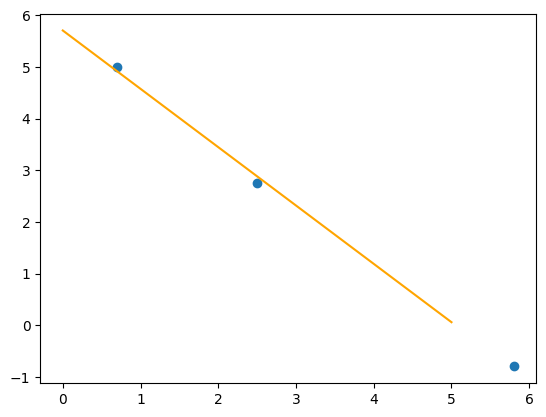

In [33]:
plot_model_and_data(w, X, y)
print(np.dot(X, w))
print(mean_squared_error(w, X, y))